In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

Load and pre-process the dataset

In [3]:
df_heart = pd.read_csv("./Dataset/HeartDataset.csv")
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
df_normalized = df_heart.copy()

In [56]:
# Normalizing the Dataset using sklearn

from sklearn.preprocessing import MinMaxScaler
columnsToNormalize = ['age', 'trestbps', 'chol', 'thalach']
for column in columnsToNormalize:
    df_normalized[column] = MinMaxScaler().fit_transform(np.array(df_normalized[column]).reshape(-1,1))
df_normalized.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,2.3,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,3.5,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,1.4,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.8,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.6,2,0,2,1


In [57]:
# Extract the target column as our true label vector
train_Y = np.array(df_heart['target'])
df_normalized.drop(['target'], axis=1, inplace=True)
train_Y = train_Y.astype('float32')
train_Y = train_Y.reshape(299,1)
# print(train_Y)
print(train_Y.shape)

(299, 1)


In [14]:
train_X = np.array(df_normalized.values)
train_X = train_X.astype('float32')
print(train_X.shape)

(299, 13)


Now out Dataset and X,Y train variables are ready

In [47]:
# Create the initialization for our parameters W,b

def initialize_parameters():
    # My model will have tree layers of 13 (Features layer), 5 Units, 3 Units and the Output Layer with 1 Unit
    # I will use Tensorflow Keras initializers to do this
    
    # And... I'll use the He initialization because i have Relu activations in my model
    initializerHe = tf.keras.initializers.HeNormal(seed=1)
    
    # And a Glotot Normal to the output layer (Sigmoid)
    initializerGn = tf.keras.initializers.GlorotNormal(seed=1)
    
    W1 = tf.Variable(initializerHe(shape=(5, 13)))
    b1 = tf.Variable(initializerHe(shape=(5, 1)))
    W2 = tf.Variable(initializerHe(shape=(3, 5)))
    b2 = tf.Variable(initializerHe(shape=(3, 1)))
    W3 = tf.Variable(initializerGn(shape=(1, 3)))
    b3 = tf.Variable(initializerGn(shape=(1, 1)))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [16]:
parameters = initialize_parameters()

Now, create the Fordward Propagation step

In [17]:
def forward_propagation(X, parameters):
    # Retrieve the parameters
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # Activations...
    
    Z1 = tf.math.add(tf.linalg.matmul(W1,X), b1)
    A1 = tf.keras.activations.relu(Z1)
    Z2 = tf.math.add(tf.linalg.matmul(W2,A1), b2)
    A2 = tf.keras.activations.relu(Z2)
    Z3 = tf.math.add(tf.linalg.matmul(W3,A2), b3)
    A3 = tf.keras.activations.sigmoid(Z3)
    
    return Z3

In [18]:
# Fordward Propagation test
print(forward_propagation(train_X.transpose(), parameters))

tf.Tensor(
[[1.3134966  1.4538339  0.66606253 1.2266047  0.36904702 0.49308527
  0.26470193 1.6985686  1.7177962  1.2588872  0.25732386 2.042914
  1.394236   1.1741472  2.0191913  0.833499   2.1805544  0.7762161
  0.17727886 0.14398205 0.14718632 2.028232   1.1843702  0.905777
  1.8931507  0.14398205 1.1476511  1.9337988  0.41409823 1.0691688
  0.6527782  0.47666803 1.8482288  0.6049826  0.7880223  0.3779548
  2.113419   1.1220694  1.4419184  1.4528129  0.14398205 1.3120744
  0.14398205 0.21279314 2.5371351  1.6561298  2.4589772  2.3805795
  2.5868368  0.78828627 1.8343743  0.31602162 0.14398205 1.5812181
  2.064909   0.14398205 1.1335421  1.1783781  3.2387419  0.14398205
  0.82974803 1.5920186  2.8863678  1.5407181  2.208911   0.14398205
  1.0749685  0.88669646 1.8382704  0.9483251  1.5614028  1.0225141
  2.0016243  0.8133675  1.8050791  0.23242772 0.73563546 1.4127707
  1.7031578  1.2362827  2.5650034  1.8225487  1.1150486  1.6740694
  0.22097908 0.5886289  0.35968477 1.6069825  0.81

Let's create the Cost function

In [19]:
def compute_cost(predicted_Y, true_Y):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    return bce(true_Y, predicted_Y)

In [23]:
# Compute cost testing
pred = tf.constant([[ 2.4048107,   5.0334096 ],
             [-0.7921977,  -4.1523376 ],
             [ 0.9447198,  -0.46802214],
             [ 1.158121,    3.9810789 ],
             [ 4.768706,    2.3220146 ],
             [ 6.1481323,   3.909829  ]])
true = tf.constant([[ 1,   0 ],
             [1,  1 ],
             [ 0,  0],
             [ 0,    0 ],
             [ 1,    1 ],
             [ 1,   0  ]])
compute_cost(pred, true)

<tf.Tensor: shape=(), dtype=float32, numpy=1.8070068>

Now, let's create the model

In [32]:
def model(X_train, Y_train, learning_rate = 0.0001, num_epochs = 1500, print_cost = True):
    
    # Save all the costs around the training
    costs = []
    
    # Initialize the parameters
    parameters = initialize_parameters()

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # I want to use the Adam optimizer in my model, in my experience, it's very efficient
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            # Do the fordward propagation
            Z3 = forward_propagation(tf.transpose(X_train), parameters)

            # Compute the cost function
            cost = compute_cost(tf.transpose(Z3), tf.transpose(Y_train))

        trainable_variables = [W1, b1, W2, b2, W3, b3]
        grads = tape.gradient(cost, trainable_variables)
        optimizer.apply_gradients(zip(grads, trainable_variables))

        if print_cost == True and epoch % 10 == 0:
            print ("Cost after epoch %i: %f" % (epoch, cost))

        costs.append(cost)
    
    return parameters, costs

Cost after epoch 0: 0.582094
Cost after epoch 10: 0.575251
Cost after epoch 20: 0.570094
Cost after epoch 30: 0.565550
Cost after epoch 40: 0.561155
Cost after epoch 50: 0.557430
Cost after epoch 60: 0.553819
Cost after epoch 70: 0.550531
Cost after epoch 80: 0.547449
Cost after epoch 90: 0.544545
Cost after epoch 100: 0.541578
Cost after epoch 110: 0.538654
Cost after epoch 120: 0.536022
Cost after epoch 130: 0.533390
Cost after epoch 140: 0.530681
Cost after epoch 150: 0.527761
Cost after epoch 160: 0.524590
Cost after epoch 170: 0.520998
Cost after epoch 180: 0.517486
Cost after epoch 190: 0.514790
Cost after epoch 200: 0.512196
Cost after epoch 210: 0.509649
Cost after epoch 220: 0.507175
Cost after epoch 230: 0.504746
Cost after epoch 240: 0.502272
Cost after epoch 250: 0.499729
Cost after epoch 260: 0.497205
Cost after epoch 270: 0.494687
Cost after epoch 280: 0.492132
Cost after epoch 290: 0.489649
Cost after epoch 300: 0.487304
Cost after epoch 310: 0.485029
Cost after epoch 32

Cost after epoch 2610: 0.268083
Cost after epoch 2620: 0.267565
Cost after epoch 2630: 0.267004
Cost after epoch 2640: 0.266518
Cost after epoch 2650: 0.266193
Cost after epoch 2660: 0.265619
Cost after epoch 2670: 0.265223
Cost after epoch 2680: 0.264857
Cost after epoch 2690: 0.264395
Cost after epoch 2700: 0.264080
Cost after epoch 2710: 0.263659
Cost after epoch 2720: 0.263379
Cost after epoch 2730: 0.263011
Cost after epoch 2740: 0.262717
Cost after epoch 2750: 0.262429
Cost after epoch 2760: 0.262117
Cost after epoch 2770: 0.261841
Cost after epoch 2780: 0.261497
Cost after epoch 2790: 0.261289
Cost after epoch 2800: 0.260971
Cost after epoch 2810: 0.260733
Cost after epoch 2820: 0.260569
Cost after epoch 2830: 0.260257
Cost after epoch 2840: 0.259904
Cost after epoch 2850: 0.259719
Cost after epoch 2860: 0.259361
Cost after epoch 2870: 0.259184
Cost after epoch 2880: 0.258817
Cost after epoch 2890: 0.258525
Cost after epoch 2900: 0.258203
Cost after epoch 2910: 0.257907
Cost aft

Cost after epoch 5190: 0.235920
Cost after epoch 5200: 0.235830
Cost after epoch 5210: 0.235823
Cost after epoch 5220: 0.235841
Cost after epoch 5230: 0.235750
Cost after epoch 5240: 0.235827
Cost after epoch 5250: 0.235836
Cost after epoch 5260: 0.235725
Cost after epoch 5270: 0.235692
Cost after epoch 5280: 0.235652
Cost after epoch 5290: 0.235652
Cost after epoch 5300: 0.235614
Cost after epoch 5310: 0.235557
Cost after epoch 5320: 0.235582
Cost after epoch 5330: 0.235608
Cost after epoch 5340: 0.235535
Cost after epoch 5350: 0.235508
Cost after epoch 5360: 0.235561
Cost after epoch 5370: 0.235486
Cost after epoch 5380: 0.235422
Cost after epoch 5390: 0.235403
Cost after epoch 5400: 0.235378
Cost after epoch 5410: 0.235364
Cost after epoch 5420: 0.235317
Cost after epoch 5430: 0.235298
Cost after epoch 5440: 0.235297
Cost after epoch 5450: 0.235288
Cost after epoch 5460: 0.235249
Cost after epoch 5470: 0.235219
Cost after epoch 5480: 0.235187
Cost after epoch 5490: 0.235177
Cost aft

Cost after epoch 7760: 0.223658
Cost after epoch 7770: 0.223566
Cost after epoch 7780: 0.223541
Cost after epoch 7790: 0.223589
Cost after epoch 7800: 0.223459
Cost after epoch 7810: 0.223484
Cost after epoch 7820: 0.223533
Cost after epoch 7830: 0.223542
Cost after epoch 7840: 0.223481
Cost after epoch 7850: 0.223380
Cost after epoch 7860: 0.223352
Cost after epoch 7870: 0.223312
Cost after epoch 7880: 0.223292
Cost after epoch 7890: 0.223343
Cost after epoch 7900: 0.223268
Cost after epoch 7910: 0.223259
Cost after epoch 7920: 0.223246
Cost after epoch 7930: 0.223174
Cost after epoch 7940: 0.223173
Cost after epoch 7950: 0.223142
Cost after epoch 7960: 0.223192
Cost after epoch 7970: 0.223242
Cost after epoch 7980: 0.223063
Cost after epoch 7990: 0.223097
Cost after epoch 8000: 0.223014
Cost after epoch 8010: 0.223029
Cost after epoch 8020: 0.223013
Cost after epoch 8030: 0.222969
Cost after epoch 8040: 0.223030
Cost after epoch 8050: 0.223015
Cost after epoch 8060: 0.222920
Cost aft

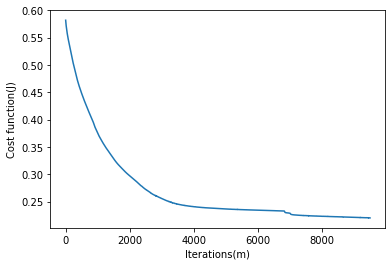

In [46]:
num_epochsTrain = 9500
parameters, costs = model(train_X, train_Y, learning_rate = 0.0009,num_epochs = num_epochsTrain)
plt.plot(np.arange(num_epochsTrain)+1, costs)
plt.xlabel("Iterations(m)")
plt.ylabel("Cost function(J)")
plt.show()

Now, we test the model

In [34]:
df_testing = pd.read_csv("./Dataset/TestingDataset.csv")
for column in columnsToNormalize:
    df_testing[column] = MinMaxScaler().fit_transform(np.array(df_testing[column]).reshape(-1,1))

test_Y = np.array(df_testing['target'])
df_testing.drop(['target'], axis=1, inplace=True)
test_Y = test_Y.astype('float32')
test_Y = test_Y.reshape(test_Y.shape[0],1)
test_X = np.array(df_testing.values)
test_X = test_X.astype('float32')



df_testing.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.828571,1,3,0.593023,0.469298,1,0,0.642276,0,2.3,0,0,1
1,0.085714,1,2,0.418605,0.543860,0,1,0.943089,0,3.5,0,0,2
2,0.200000,0,1,0.418605,0.342105,0,0,0.821138,0,1.4,2,0,2
3,0.628571,1,1,0.302326,0.482456,0,1,0.869919,0,0.8,2,0,2
4,0.657143,0,0,0.302326,1.000000,0,1,0.747967,1,0.6,2,0,2


In [49]:
Z3 = forward_propagation(tf.transpose(test_X), parameters)
A3 = tf.keras.activations.sigmoid(Z3)
A3 = tf.math.round(A3)
trueVector = A3 == test_Y.transpose()
# print(test_Y.sum())
# print(test_Y.shape[0])
goodPredictionsCounter = trueVector.numpy().sum()
perc = (goodPredictionsCounter/test_Y.shape[0]) * 100
print("The accuracy on the testing Dataset was of %i: " % (perc))

Z3 = forward_propagation(tf.transpose(train_X), parameters)
A3 = tf.keras.activations.sigmoid(Z3)
A3 = tf.math.round(A3)
trueVector = A3 == train_Y.transpose()
goodPredictionsCounter = trueVector.numpy().sum()
perc = (goodPredictionsCounter/train_Y.shape[0]) * 100
print("The accuracy on the train Dataset was of %i: " % (perc))

The accuracy on the testing Dataset was of 89: 
The accuracy on the train Dataset was of 90: 
